In [8]:
!pip install git+https://github.com/quantopian/pyfolio
!pip install yfinance
!pip install pandas
!pip install pyfolio

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-umqd_lzk
  Running command git clone --filter=blob:none --quiet https://github.com/quantopian/pyfolio /tmp/pip-req-build-umqd_lzk
  Resolved https://github.com/quantopian/pyfolio to commit 4b901f6d73aa02ceb6d04b7d83502e5c6f2e81aa
  Preparing metadata (setup.py) ... done


In [9]:
! pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas_datareader.data as web







In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

In [24]:
tickers = ['ABEV3.SA', "ITSA4.SA", "WEGE3.SA", "USIM5.SA",'^BVSP']
dados_yahoo = yf.download(tickers, period="5y")["Close"]


[*********************100%***********************]  5 of 5 completed


In [25]:
dados_yahoo

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,WEGE3.SA,^BVSP
Date,,,,,
2020-03-09,11.713225,6.066010,5.282115,18.459852,86067.000000
2020-03-10,11.513614,6.194836,5.698281,19.462954,92214.000000
2020-03-11,10.978653,5.825163,5.202082,18.204430,85171.000000
2020-03-12,9.246022,5.192235,4.481794,15.325157,72583.000000
2020-03-13,10.140283,5.713139,5.218089,16.035688,82678.000000
...,...,...,...,...,...
2025-02-27,12.320000,8.971710,5.960000,48.594349,124799.000000
2025-02-28,12.220000,8.742941,5.710000,48.117348,122799.000000
2025-03-05,12.780000,8.830000,5.850000,47.650002,123047.000000


In [26]:
retorno = dados_yahoo.pct_change()
retorno

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,WEGE3.SA,^BVSP
Date,,,,,
2020-03-09,NaN,NaN,NaN,NaN,NaN
2020-03-10,-0.017042,0.021237,0.078788,0.054340,0.071421
2020-03-11,-0.046463,-0.059674,-0.087079,-0.064663,-0.076377
2020-03-12,-0.157818,-0.108654,-0.138461,-0.158163,-0.147797
2020-03-13,0.096718,0.100324,0.164286,0.046364,0.139082
...,...,...,...,...,...
2025-02-27,0.052991,0.003337,-0.001675,0.021944,0.000240
2025-02-28,-0.008117,-0.025499,-0.041946,-0.009816,-0.016026
2025-03-05,0.045826,0.009958,0.024518,-0.009713,0.002020


In [27]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,WEGE3.SA,^BVSP
Date,,,,,
2020-03-09,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-10,0.982958,1.021237,1.078788,1.054340,1.071421
2020-03-11,0.937287,0.960296,0.984848,0.986163,0.989590
2020-03-12,0.789366,0.855956,0.848485,0.830189,0.843331
2020-03-13,0.865712,0.941828,0.987879,0.868679,0.960624
...,...,...,...,...,...
2025-02-27,1.051802,1.479013,1.128336,2.632434,1.450021
2025-02-28,1.043265,1.441300,1.081006,2.606594,1.426784
2025-03-05,1.091074,1.455652,1.107511,2.581278,1.429665


In [28]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira


Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,WEGE3.SA,^BVSP,saldo,retorno
Date,,,,,,,
2020-03-09,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2020-03-10,9829.584374,10212.372984,10787.878235,10543.396197,10714.211022,52087.442811,0.041749
2020-03-11,9372.869225,9602.956291,9848.484260,9861.633458,9895.895059,48581.838292,-0.067302
2020-03-12,7893.660317,8559.556399,8484.848923,8301.885077,8433.313581,41673.264297,-0.142205
2020-03-13,8657.122454,9418.281636,9878.788311,8686.791319,9606.237001,46247.220721,0.109758
...,...,...,...,...,...,...,...
2025-02-27,10518.024977,14790.134219,11283.360161,26324.343409,14500.214949,77416.077715,0.014790
2025-02-28,10432.651884,14413.001141,10810.064855,26065.944162,14267.837847,75989.499890,-0.018427
2025-03-05,10910.743484,14556.520557,11075.109974,25812.775185,14296.652608,76651.801807,0.008716


In [43]:
carteira["retorno"] = pd.to_numeric(carteira["retorno"], errors="coerce")
retorno["^BVSP"] = pd.to_numeric(retorno["^BVSP"], errors="coerce")

(0.8, 1.4)

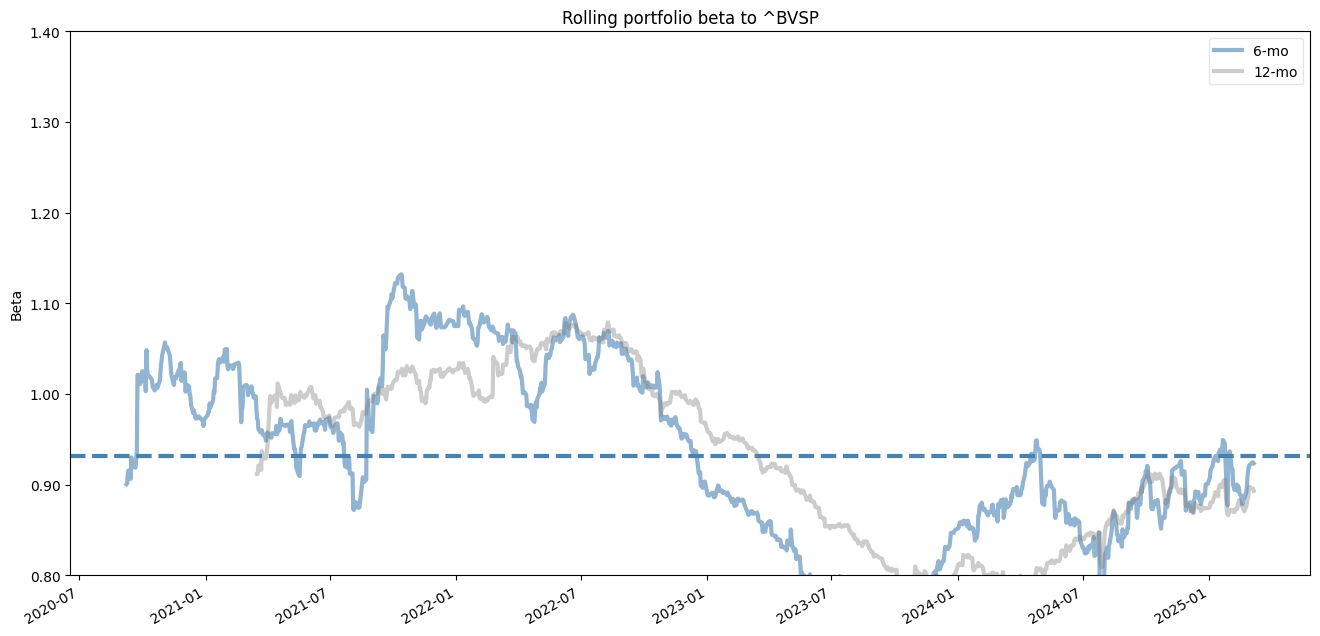

In [44]:
fig,ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4))